In [1]:
import pickle
import pandas as pd
from report.plots import plot_loss_curve, plot_acc_curve
from report import basic_report

In [2]:
pd.set_option('display.max_rows', None)
metrics = pd.read_csv("./experiments/vgg/version_0/metrics.csv")
metrics['epoch'] = metrics['epoch'].fillna(method='ffill')

In [3]:
metrics.head()

,train_loss_step,train_acc_step,epoch,step,val_loss_step,val_acc_step,val_loss_epoch,val_acc_epoch,train_loss_epoch,train_acc_epoch
0,1.426516,0.3125,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.379265,0.3750,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.208318,0.3750,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.277355,0.4375,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN
4,1.044695,0.6250,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
metrics.shape

(2715, 10)

In [5]:
import numpy as np
EPOCHS = 15

def log_metrics_dataframe(epochs):
    train_metrics = []
    valid_metrics = []
    epoch_train_metrics = []
    epoch_valid_metrics = []
    
    for n, batch in enumerate(np.split(metrics, epochs)):
        train_metrics.append(batch[["epoch", "step", "train_loss_step", "train_acc_step"]][:125])
        valid_metrics.append(batch[["epoch", "step", "val_loss_step", "val_acc_step"]][125:179])
        epoch_valid_metrics.append(batch[["epoch", "val_loss_epoch", "val_acc_epoch"]][179:180])
        epoch_train_metrics.append(batch[["epoch", "train_loss_epoch", "train_acc_epoch"]][180:181])
    
    train_metrics = pd.concat(train_metrics, axis=0)
    valid_metrics = pd.concat(valid_metrics, axis=0)
    epoch_train_metrics = pd.concat(epoch_train_metrics, axis=0)
    epoch_valid_metrics = pd.concat(epoch_valid_metrics, axis=0)
    epoch_metrics = pd.merge(epoch_train_metrics, epoch_valid_metrics, on='epoch')
    epoch_metrics["train_acc_epoch"] = epoch_metrics["train_acc_epoch"] * 100
    epoch_metrics["val_acc_epoch"] = epoch_metrics["val_acc_epoch"] * 100
    return train_metrics, valid_metrics, epoch_metrics

train_metrics, valid_metrics, epoch_metrics = log_metrics_dataframe(EPOCHS)

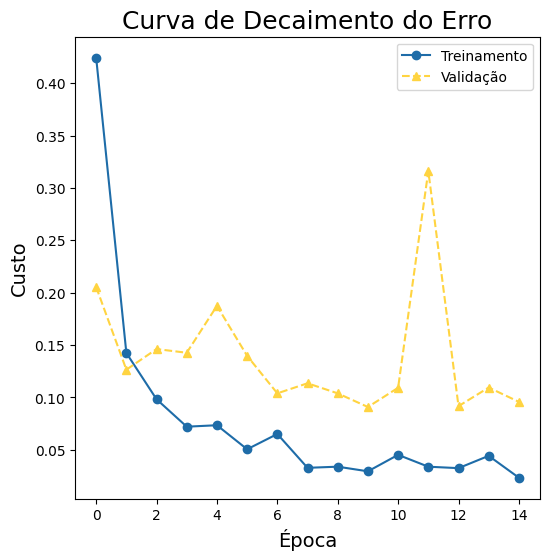

In [6]:
plot_loss_curve(epoch_metrics, show=True, save_as="./experiments/vgg/version_0/vgg-loss.png")

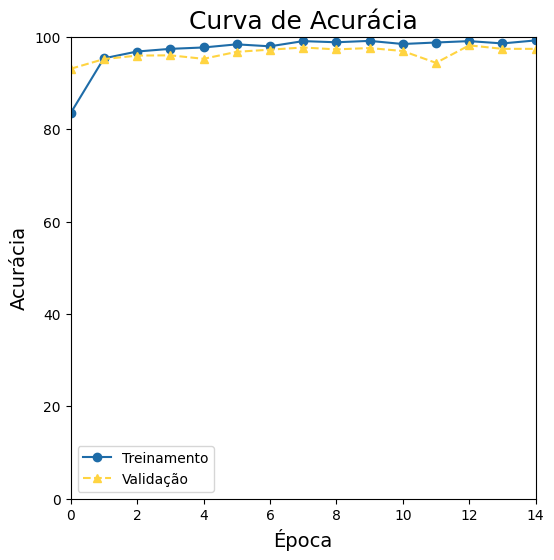

In [7]:
plot_acc_curve(epoch_metrics, show=True, save_as="./experiments/vgg/version_0/vgg-acc.png")

In [8]:
with open("./experiments/vgg/version_0/vgg-preds.dump", "rb") as f:
    truth_labels, preds_labels = pickle.load(f)

Classification report
              precision    recall  f1-score   support

      glioma      0.997     0.977     0.987       300
  meningioma      0.966     0.941     0.954       306
     notumor      0.960     1.000     0.979       405
   pituitary      0.997     0.987     0.992       300

    accuracy                          0.978      1311
   macro avg      0.980     0.976     0.978      1311
weighted avg      0.978     0.978     0.978      1311



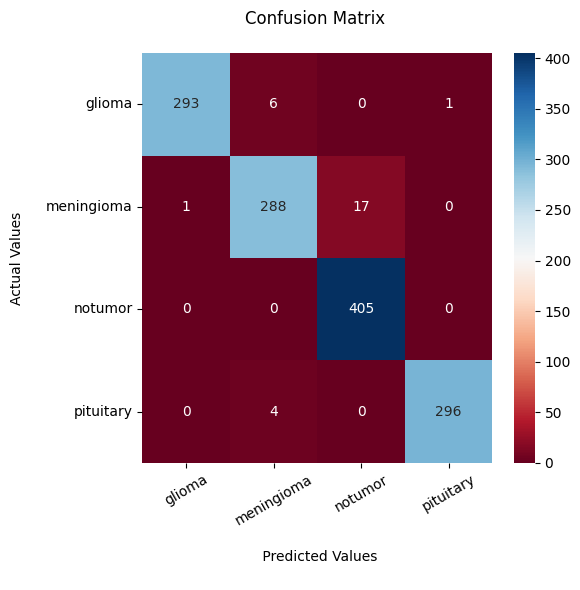

,gli,men,not,pit
glioma,293,6,0,1
meningioma,1,288,17,0
notumor,0,0,405,0
pituitary,0,4,0,296


In [9]:
basic_report(truth_labels, preds_labels, labels=[0,1,2,3], label_names=["glioma", "meningioma", "notumor", "pituitary"], show=True, save_as="./experiments/vgg/version_0/vgg-confusion-matrix.png")